# Insights

* Mice on Capomulin	Ramicane had the smallest tumor sizes on averages
* For mice on Capomulin, there is a positive correlation between a mouse's weight and it's tumor size
* For Mouse b128, there was a 15.5% decrease in tumor volume over the course of the study

In [17]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()

In [2]:
#study_results.head()

In [3]:
# Combine the data into a single dataset
mice_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mice_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Get the number of unique mice in the DataFrame.
unique_mice_count = mice_merge_df['Mouse ID'].nunique()
unique_mice_count

249

# Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_mice = mice_merge_df[["Drug Regimen", "Tumor Volume (mm3)"]]
groupby_data = summary_mice.groupby(["Drug Regimen"])

stats_df = pd.DataFrame({
    "Mean": groupby_data["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": groupby_data["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": groupby_data["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": groupby_data["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": groupby_data["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": groupby_data["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

stats_df

,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60
Placebo,54.03,52.29,45.00,61.17,7.82,0.58
Propriva,52.32,50.85,45.00,42.35,6.51,0.51
Ramicane,40.22,40.67,45.00,23.49,4.85,0.32
Stelasyn,54.23,52.43,45.00,59.45,7.71,0.57


# Bar Plots

In [14]:
groupby_data_2 = mice_merge_df.groupby("Drug Regimen")
stats_df_2 = groupby_data_2["Tumor Volume (mm3)"].mean().to_frame()
stats_df_2.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


<IPython.core.display.Javascript object>


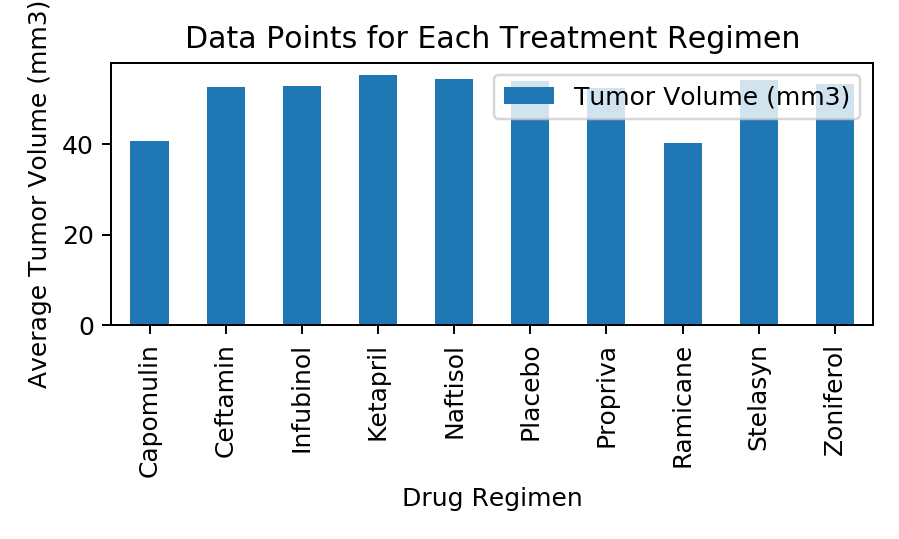

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
stats_df_2.plot(kind="bar", figsize=(5,3))
plt.title("Data Points for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


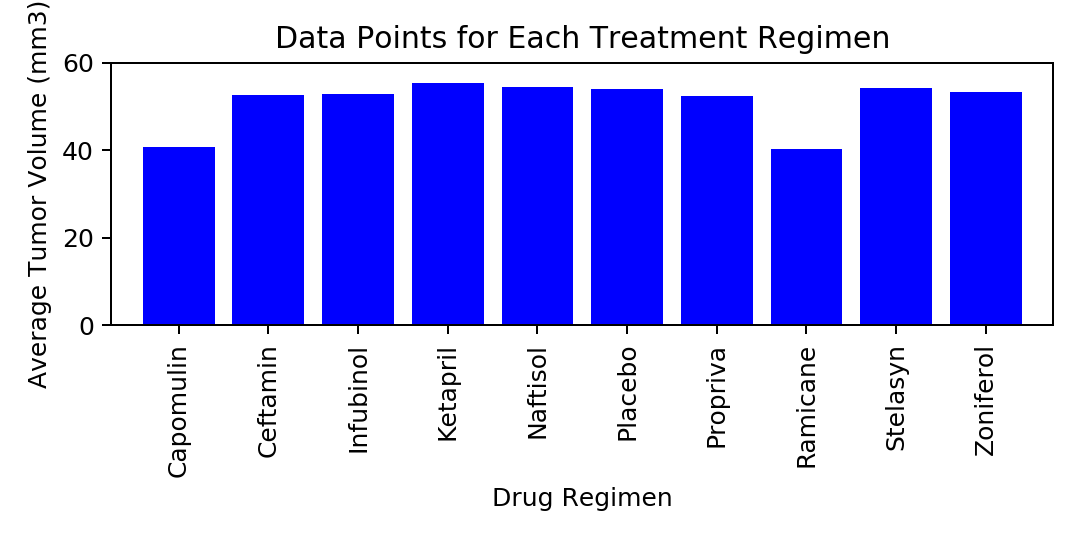

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
xAxis = np.arange(len(stats_df_2))
tick_loc = [value for value in xAxis]

plt.figure(figsize=(6, 3))
plt.bar(xAxis, stats_df_2["Tumor Volume (mm3)"], color='blue')
plt.xticks(tick_loc, list(stats_df_2.index), rotation="vertical") 
plt.xlim(-0.75, len(xAxis) - 0.25)
plt.ylim(0, 60)
plt.title("Data Points for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

# Pie Plots

<IPython.core.display.Javascript object>


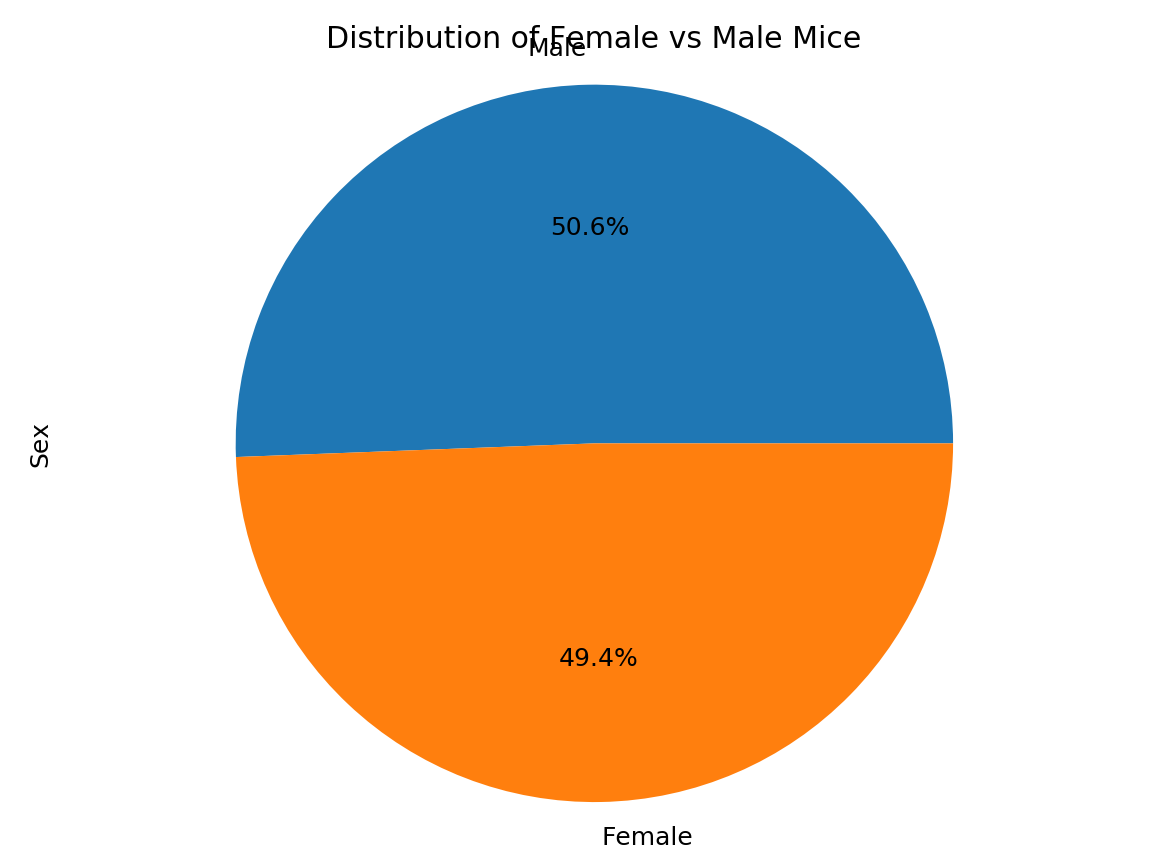

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = mice_merge_df["Sex"].value_counts()
plt.figure()
mice_count.plot(kind="pie", autopct='%1.1f%%')
plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


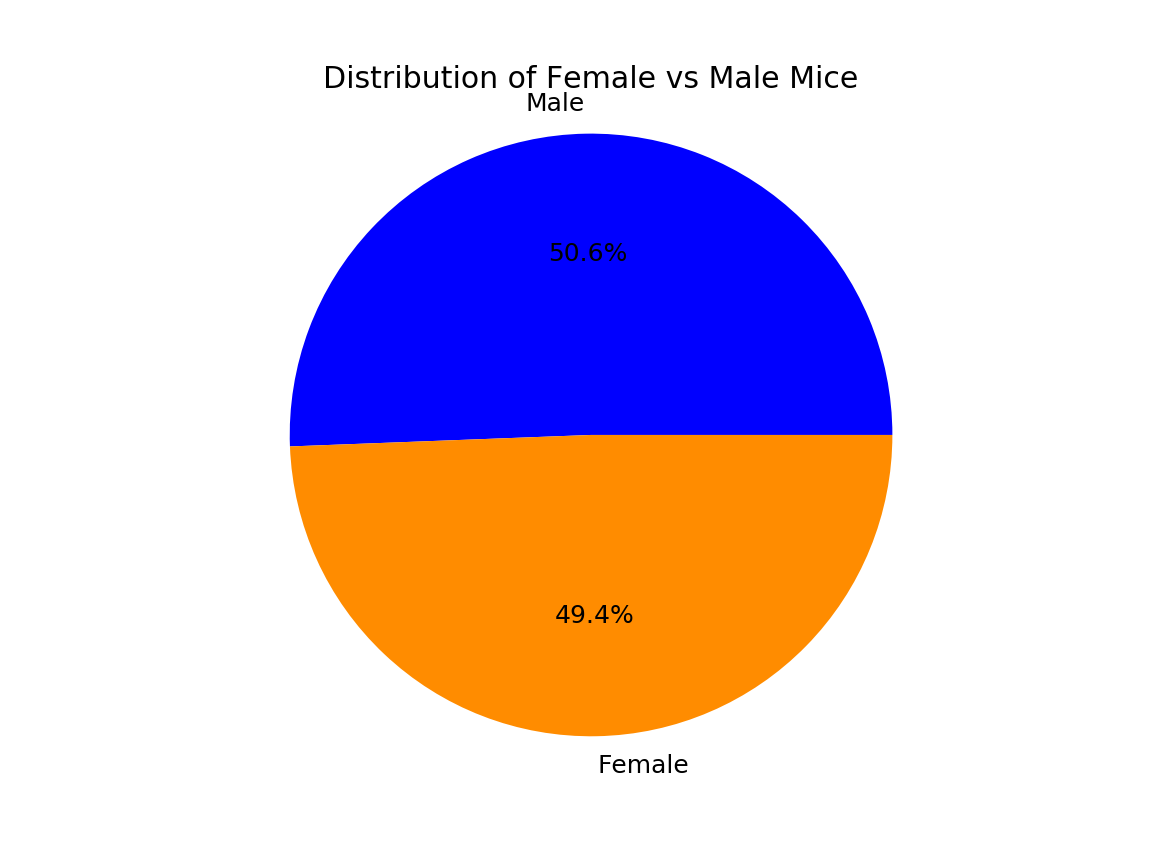

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue","darkorange"]
plt.figure()
plt.pie(mice_count.values, labels=mice_count.index.values, colors=colors,
        autopct="%1.1f%%", startangle=0)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.show()

# Quartiles, Outliers and Boxplots

In [43]:
regimen_data = mice_merge_df[(mice_merge_df["Drug Regimen"] == "Capomulin") | 
                          (mice_merge_df["Drug Regimen"] == "Ramicane") | 
                          (mice_merge_df["Drug Regimen"] == "Infubinol") | 
                          (mice_merge_df["Drug Regimen"] == "Ceftamin")]

regimen_data = regimen_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimen_data = regimen_data.groupby(["Mouse ID", "Drug Regimen"])
regimen_df = regimen_data["Tumor Volume (mm3)"].sum().to_frame()
regimen_plot = regimen_df["Tumor Volume (mm3)"]
regimen_df.head()

# quartile calculations
quartiles = regimen_plot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


<IPython.core.display.Javascript object>


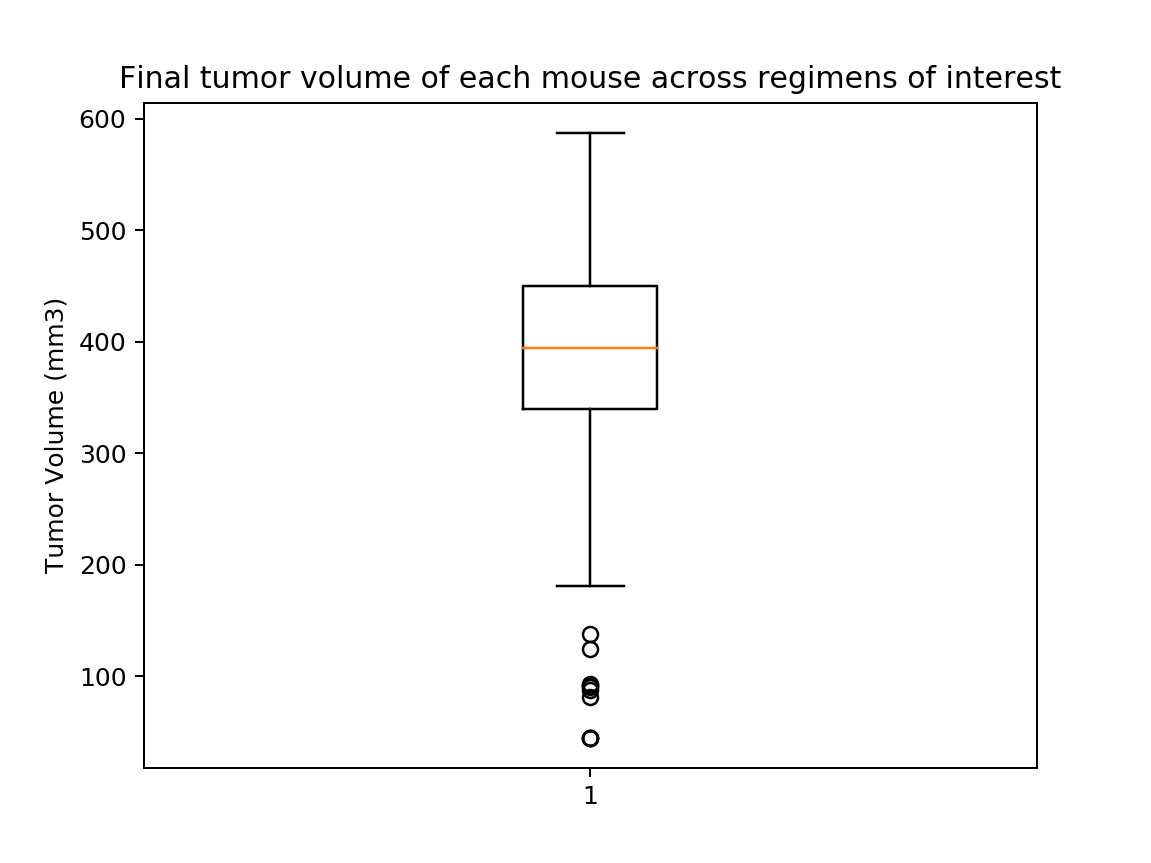

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each mouse across regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(regimen_plot)
plt.show()

# Line and Scatter Plots

<IPython.core.display.Javascript object>


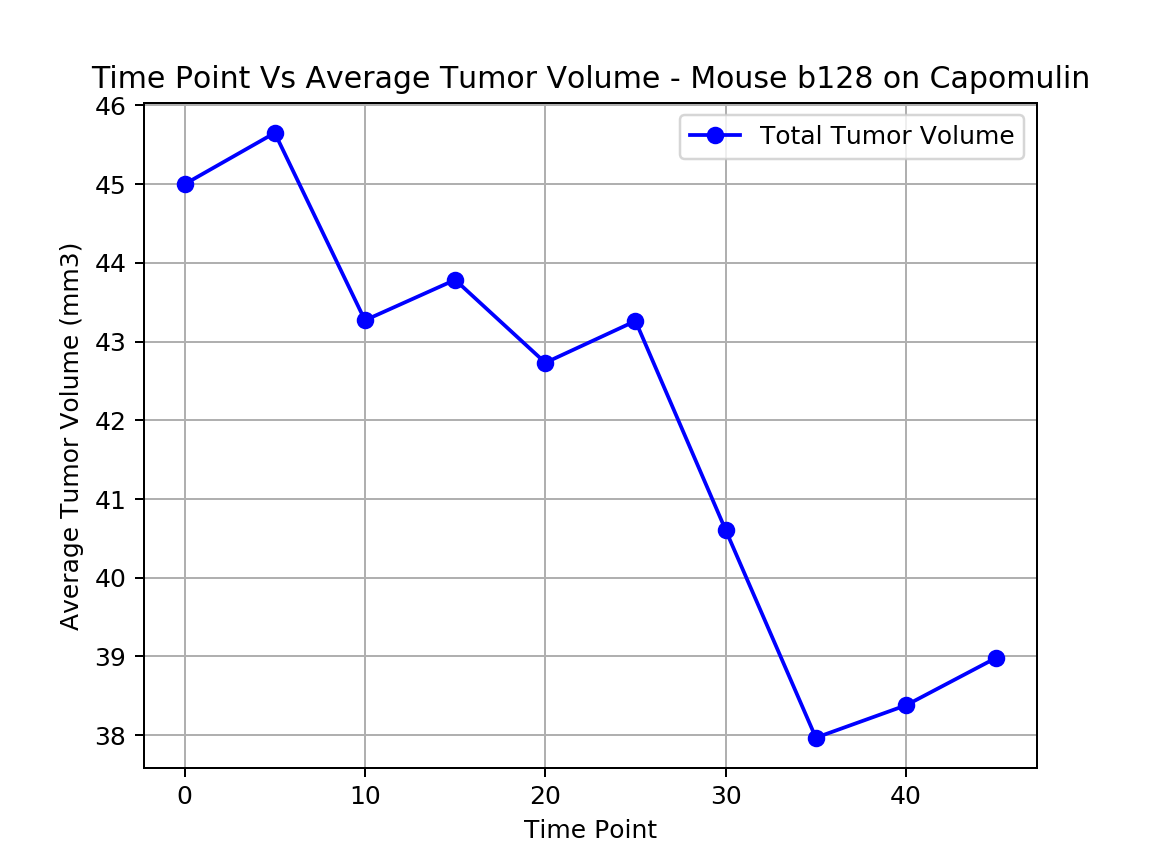

In [68]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_data = mice_merge_df[(mice_merge_df["Drug Regimen"] == "Capomulin") & (mice_merge_df["Mouse ID"] == "b128")]
tumor_data = tumor_data.groupby(["Drug Regimen", "Timepoint"])
tumor_data_df = tumor_data["Tumor Volume (mm3)"].mean().to_frame()
tumor_index_df = tumor_data_df.unstack(0)
tumor_plot_df = tumor_index_df["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
tumor_total, = plt.plot(xAxis, tumor_plot_df["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[tumor_total], loc="best")
plt.title("Time Point Vs Average Tumor Volume - Mouse b128 on Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

# # Generate a line plot with Ramicane (for comparison)
# tumor_data = mice_merge_df[(mice_merge_df["Drug Regimen"] == "Ramicane") & (mice_merge_df["Mouse ID"])]
# tumor_data = tumor_data.groupby(["Drug Regimen", "Timepoint"])
# tumor_data_df = tumor_data["Tumor Volume (mm3)"].mean().to_frame()
# tumor_index_df = tumor_data_df.unstack(0)
# tumor_plot_df = tumor_index_df["Tumor Volume (mm3)"]

# xAxis = [0,5,10,15,20,25,30,35,40,45]
# plt.figure()
# tumor_total, = plt.plot(xAxis, tumor_plot_df["Ramicane"], marker= "o", color="blue", label="Total Tumor Volume" )
# plt.legend(handles=[tumor_total], loc="best")
# plt.title("Time Point Vs Average Tumor Volume - Ramicane")
# plt.xlabel("Time Point")
# plt.ylabel("Average Tumor Volume (mm3)")
# plt.grid(True)
# plt.show()

<IPython.core.display.Javascript object>


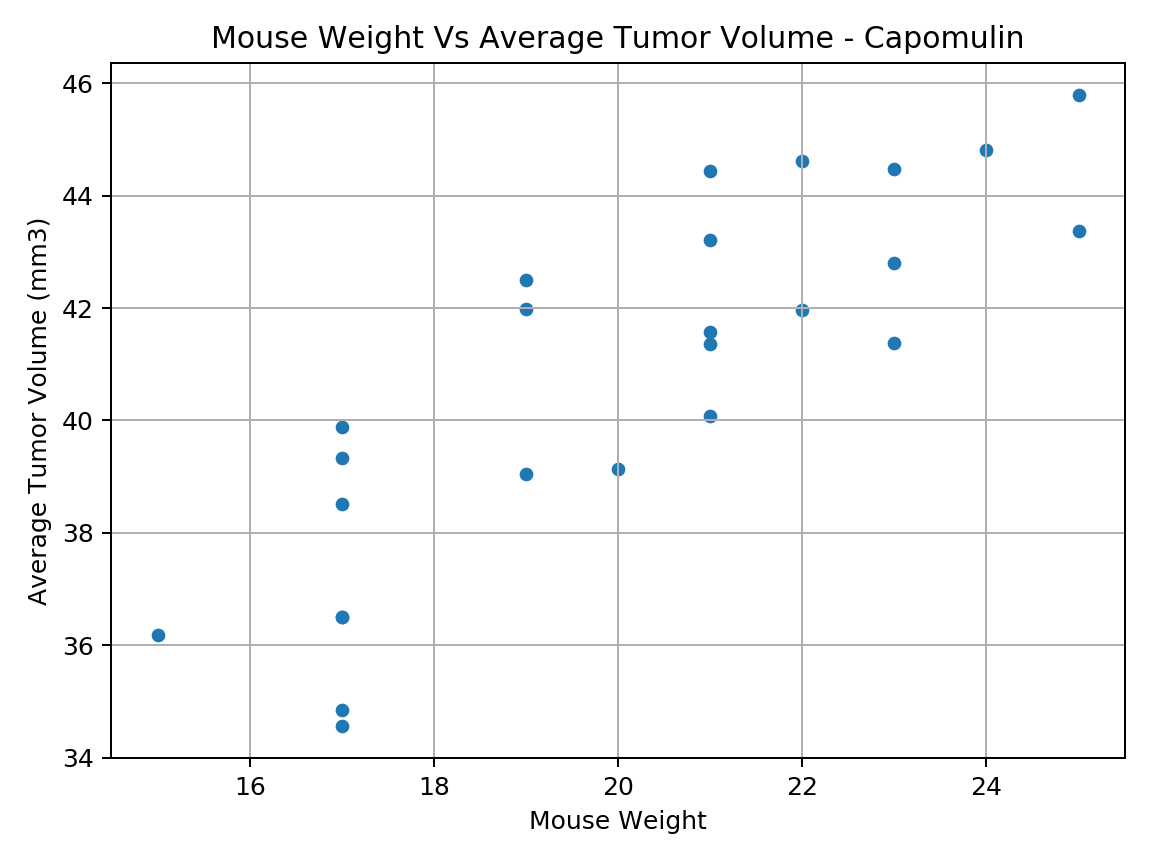

In [57]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Compile data
scatter_data = mice_merge_df[(mice_merge_df["Drug Regimen"] == "Capomulin")]
scatter_data = scatter_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
groupby_data = scatter_data.groupby(["Mouse ID","Weight (g)"])
scatter_data_df = groupby_data["Tumor Volume (mm3)"].mean().to_frame()
scatter_data_df = scatter_data_df.reset_index()

#Generate scatter plot
scatter_data_df.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume - Capomulin")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(scatter_data_df["Weight (g)"], scatter_data_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


<IPython.core.display.Javascript object>


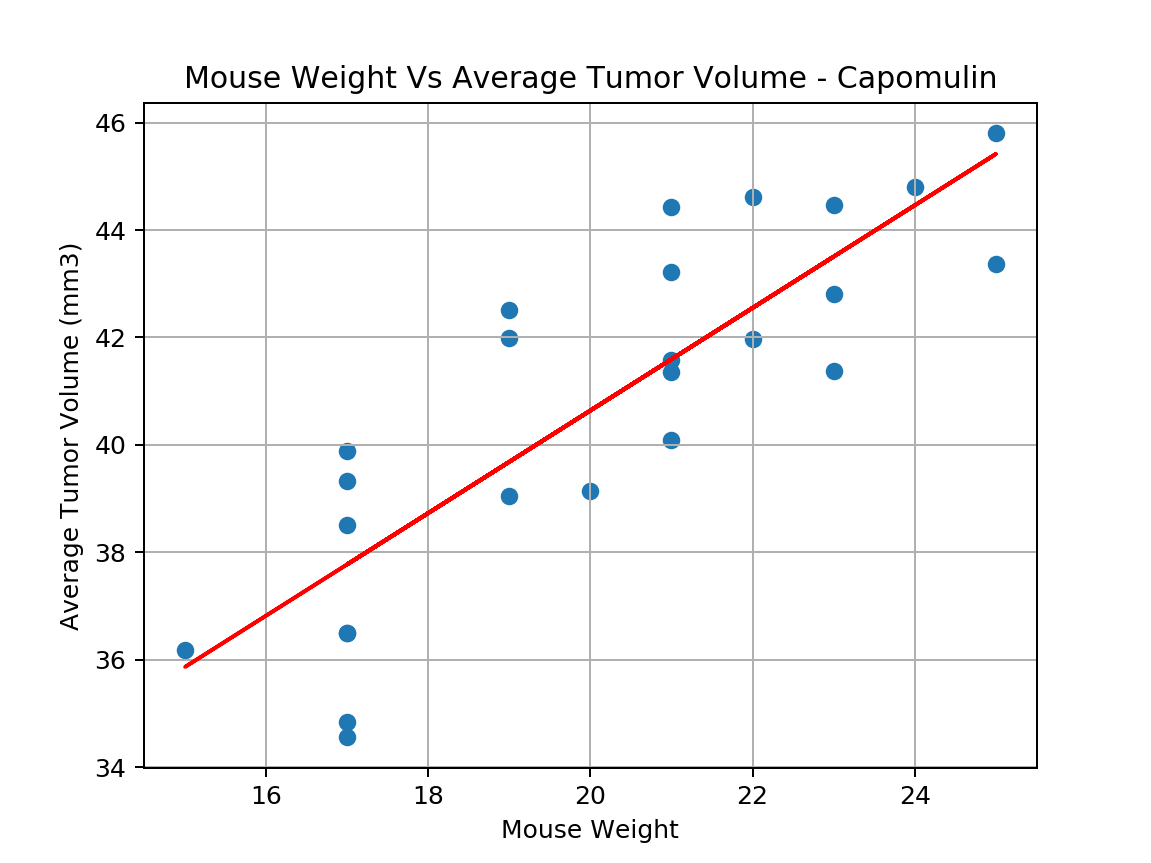

In [58]:
# Linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatter_data_df["Weight (g)"]
y_values = scatter_data_df["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight Vs Average Tumor Volume - Capomulin")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()